In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler


In [2]:
data = pd.read_csv('Covid-19_VietNam.csv', usecols=[1,5,6])
data['dateRep'] = pd.to_datetime(data['dateRep'])
data.head()

,dateRep,cases,total
0,2019-12-31,0,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,0,0
4,2020-01-04,0,0


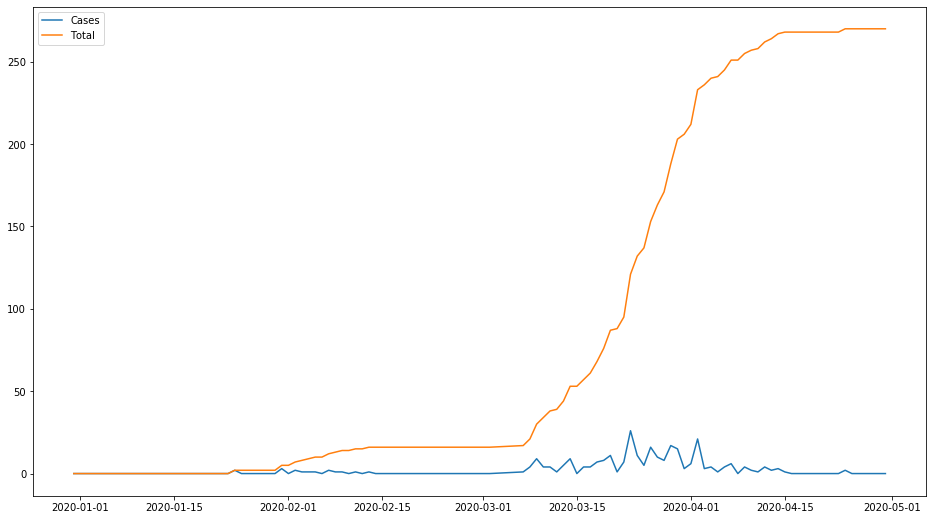

In [3]:
plt.figure(figsize=(16,9))
x = data['dateRep']
y = data['cases']
z = data['total']
plt.plot(x,y)
plt.plot(x,z)
plt.legend(['Cases', 'Total'])
plt.show()

In [4]:
def create_dataset(dataset, look_back=9):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back),0]
		dataX.append(a)
		dataY.append(dataset[i + look_back,0])
	return np.array(dataX), np.array(dataY)


In [5]:
from sklearn.preprocessing import MinMaxScaler
dataset = data['total'].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset.shape

(118, 1)

In [6]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [7]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX)

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.00740741]
 [0.00740741]
 [0.00740741]
 [0.00740741]
 [0.00740741]
 [0.00740741]
 [0.00740741]
 [0.01851852]
 [0.01851852]
 [0.02592593]
 [0.02962963]
 [0.03333333]
 [0.03703704]
 [0.03703704]
 [0.04444444]
 [0.04814815]
 [0.05185185]
 [0.05185185]
 [0.05555556]
 [0.05555556]
 [0.05925926]
 [0.05925926]
 [0.05925926]
 [0.05925926]
 [0.05925926]
 [0.05925926]
 [0.05925926]
 [0.05925926]
 [0.05925926]
 [0.05925926]
 [0.05925926]
 [0.05925926]
 [0.05925926]
 [0.05925926]
 [0.05925926]
 [0.05925926]
 [0.05925926]
 [0.05925926]
 [0.05925926]
 [0.06296296]
 [0.07777777]
 [0.11111111]
 [0.12592593]
 [0.14074074]
 [0.14444444]
 [0.16296296]
 [0.19629629]
 [0.19

In [8]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(LSTM(256, input_shape=(1, look_back), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=15, batch_size=2, verbose=2)

Epoch 1/15
40/40 - 0s - loss: 0.0120
Epoch 2/15
40/40 - 0s - loss: 0.0092
Epoch 3/15
40/40 - 0s - loss: 0.0087
Epoch 4/15
40/40 - 0s - loss: 0.0079
Epoch 5/15
40/40 - 0s - loss: 0.0076
Epoch 6/15
40/40 - 0s - loss: 0.0070
Epoch 7/15
40/40 - 0s - loss: 0.0057
Epoch 8/15
40/40 - 0s - loss: 0.0049
Epoch 9/15
40/40 - 0s - loss: 0.0047
Epoch 10/15
40/40 - 0s - loss: 0.0031
Epoch 11/15
40/40 - 0s - loss: 0.0032
Epoch 12/15
40/40 - 0s - loss: 0.0020
Epoch 13/15
40/40 - 0s - loss: 0.0024
Epoch 14/15
40/40 - 0s - loss: 8.6144e-04
Epoch 15/15
40/40 - 0s - loss: 6.4140e-04


In [10]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = trainPredict.reshape(-1,1)
testPredict = testPredict.reshape(-1,1)
#trainPredict = scaler.inverse_transform(trainPredict)
#testPredict = scaler.inverse_transform(testPredict)
#dataset = scaler.inverse_transform(dataset)

In [11]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
dataset = scaler.inverse_transform(dataset)

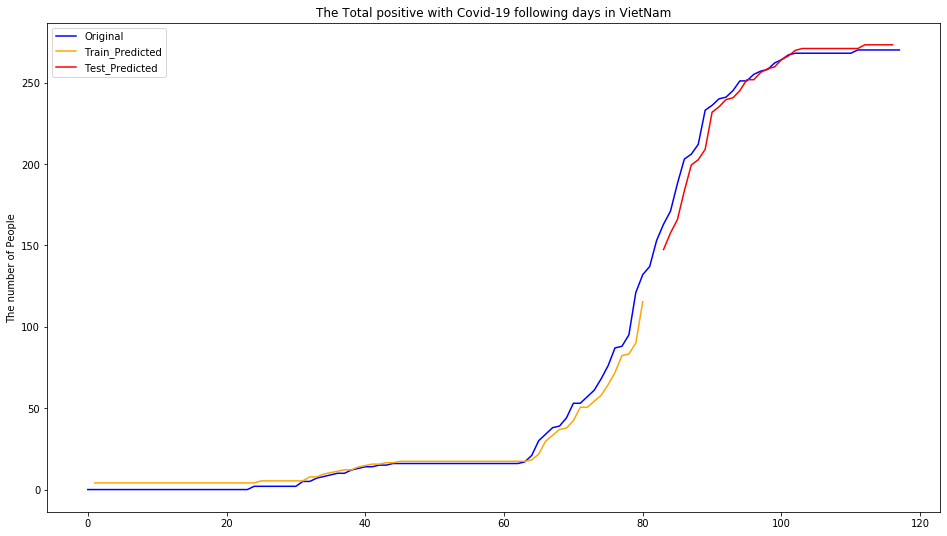

In [12]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(16,9))
plt.plot(dataset, color = 'blue')
plt.plot(trainPredictPlot, color = 'orange')
plt.plot(testPredictPlot, color = 'red')
plt.legend(['Original','Train_Predicted','Test_Predicted'])
plt.title('The Total positive with Covid-19 following days in VietNam')
plt.ylabel('The number of People')
plt.show()

In [13]:
testY =scaler.inverse_transform(testY.reshape(-1,1))

In [14]:
testY

array([[163.],
       [171.],
       [188.],
       [203.],
       [206.],
       [212.],
       [233.],
       [236.],
       [240.],
       [241.],
       [245.],
       [251.],
       [251.],
       [255.],
       [257.],
       [258.],
       [262.],
       [264.],
       [267.],
       [268.],
       [268.],
       [268.],
       [268.],
       [268.],
       [268.],
       [268.],
       [268.],
       [268.],
       [270.],
       [270.],
       [270.],
       [270.],
       [270.],
       [270.]], dtype=float32)

In [15]:
testPredict

array([[147.42786],
       [157.62724],
       [165.85071],
       [183.51546],
       [199.36795],
       [202.56802],
       [208.99529],
       [231.79968],
       [235.09723],
       [239.50842],
       [240.61404],
       [245.04794],
       [251.73288],
       [251.73288],
       [256.21222],
       [258.45874],
       [259.58374],
       [264.09497],
       [266.35745],
       [269.75967],
       [270.89606],
       [270.89606],
       [270.89606],
       [270.89606],
       [270.89606],
       [270.89606],
       [270.89606],
       [270.89606],
       [270.89606],
       [273.1722 ],
       [273.1722 ],
       [273.1722 ],
       [273.1722 ],
       [273.1722 ]], dtype=float32)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = mean_absolute_error(testY, testPredict)
MSE = mean_squared_error(testY, testPredict)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

5.3431087
65.85045
8.114829


In [17]:
from sklearn.preprocessing import MinMaxScaler
dataset = data['total'].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset.shape

(118, 1)

In [18]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [19]:
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [20]:
ANN_model = Sequential()
ANN_model.add(Dense(128, input_shape=(1, look_back), activation='relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(1))
ANN_model.compile(loss='mean_squared_error', optimizer='adam')
ANN_model.fit(trainX, trainY, epochs=4, batch_size=2, verbose=2)

Epoch 1/4
37/37 - 0s - loss: 0.0108
Epoch 2/4
37/37 - 0s - loss: 0.0026
Epoch 3/4
37/37 - 0s - loss: 0.0020
Epoch 4/4
37/37 - 0s - loss: 7.1078e-04


In [21]:
trainPredict = ANN_model.predict(trainX)
testPredict = ANN_model.predict(testX)
trainPredict = trainPredict.reshape(-1,1)
testPredict = testPredict.reshape(-1,1)

In [22]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
dataset = scaler.inverse_transform(dataset)

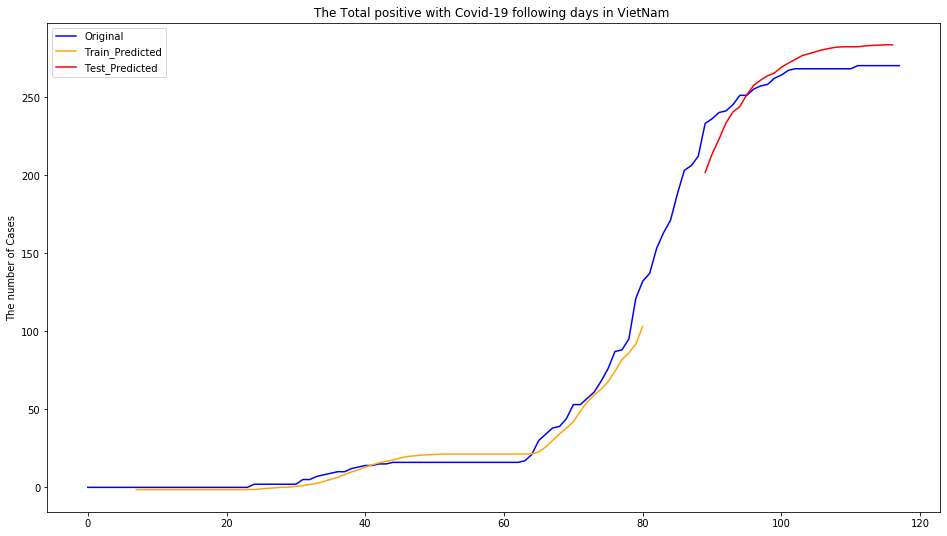

In [23]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(16,9))
plt.plot(dataset, color = 'blue')
plt.plot(trainPredictPlot, color = 'orange')
plt.plot(testPredictPlot, color = 'red')
plt.legend(['Original','Train_Predicted','Test_Predicted'])
plt.title('The Total positive with Covid-19 following days in VietNam ')
plt.ylabel('The number of Cases')
plt.show()

In [24]:
testY =scaler.inverse_transform(testY.reshape(-1,1))

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = mean_absolute_error(testY, testPredict)
MSE = mean_squared_error(testY, testPredict)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

10.547991
151.92029
12.325595
